# CMPINF 2120 
# Bayesian Inference

In [1]:
pip install pymc3

     |████████████████████████████████| 869 kB 4.2 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 6.8 MB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 23.7 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 26.8 MB/s eta 0:00:01
     |████████████████████████████████| 759 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 313 kB 36.6 MB/s eta 0:00:01
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529946 sha256=8da4d5832196e19a19b2f3a65b02e94bf6cdb39290d498abd23157812fab1844
  Stored in directory: /home/jovyan/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built theano-pymc
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install arviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import pylab

import pymc3 as pm
import arviz as az

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


### Acceleration due to gravity on Earth 2

Read in dataset

In [4]:
df = pd.read_csv('duplicate-earth-displacement.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          100 non-null    float64
 1   time^2        100 non-null    float64
 2   displacement  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
df.head()

,time,time^2,displacement
0,0.000000,0.000000,-0.022860
1,0.010101,0.000102,0.579796
2,0.020202,0.000408,-0.054100
3,0.030303,0.000918,-0.036855
4,0.040404,0.001632,-0.116797


In [7]:
x_1 = df['time']

In [8]:
x_1

0     0.000000
1     0.010101
2     0.020202
3     0.030303
4     0.040404
        ...   
95    0.959596
96    0.969697
97    0.979798
98    0.989899
99    1.000000
Name: time, Length: 100, dtype: float64

In [9]:
x_2 = df['time^2']

In [10]:
x_2

0     0.000000
1     0.000102
2     0.000408
3     0.000918
4     0.001632
        ...   
95    0.920824
96    0.940312
97    0.960004
98    0.979900
99    1.000000
Name: time^2, Length: 100, dtype: float64

In [11]:
y = df.displacement

In [12]:
y

0     -0.022860
1      0.579796
2     -0.054100
3     -0.036855
4     -0.116797
        ...    
95     9.990839
96    10.497322
97     7.900575
98    12.782528
99    13.724198
Name: displacement, Length: 100, dtype: float64

#### Scatterplots

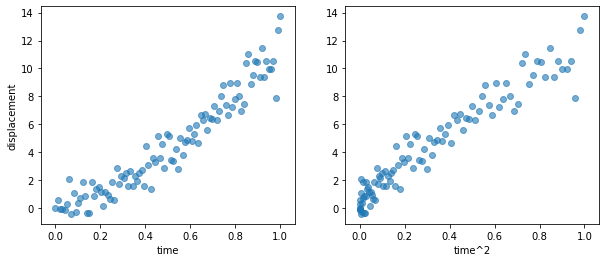

In [13]:
fig, axes = pylab.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(x_1, y, alpha=0.6)
axes[1].scatter(x_2, y, alpha=0.6)
axes[0].set_ylabel("displacement")
axes[0].set_xlabel("time")
axes[1].set_xlabel("time^2");

#### Non-Bayesian linear regression

In [14]:
from sklearn.linear_model import LinearRegression

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

In [15]:
X = df.loc[:, ['time', 'time^2']]

In [16]:
regressor = LinearRegression()

In [17]:
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regressor.coef_)

[4.01322277 7.63280745]


$ X = 4.0132 t + 7.6328 t^2$

$\alpha = 2 * 7.6328 = 15.2656$

#### Bayesian Model Specification

In [19]:
basic_model = pm.Model()

In [20]:
with basic_model:

    # Priors for unknown model parameters
    v_0 = pm.Normal("v_0", mu=4, sigma=1)
    alpha = pm.Normal("alpha", mu=9.8, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = v_0 * x_1 + 0.5* alpha * x_2

    # Likelihood (sampling distribution) of observations
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

In [21]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

{'v_0': array(5.39856597),
 'alpha': array(11.61875728),
 'sigma_log__': array(-0.08396056),
 'sigma': array(0.91946752)}

$ X = 10.232  t + \frac{1}{2} 11.6187 t^2 \pm 1.2 $

$ \alpha = 11.6187$

#### Sampling the Posterior Distribution

In [22]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, v_0]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 20 seconds.
The acceptance probability does not match the target. It is 0.8833195514653757, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8816470200142675, but should be close to 0.8. Try to increase the number of tuning steps.


In [23]:
trace["alpha"][-5:]

array([11.15484886, 11.22298883, 11.59713177, 11.59713177, 11.50784481])

In [24]:
az.style.use("arviz-darkgrid")

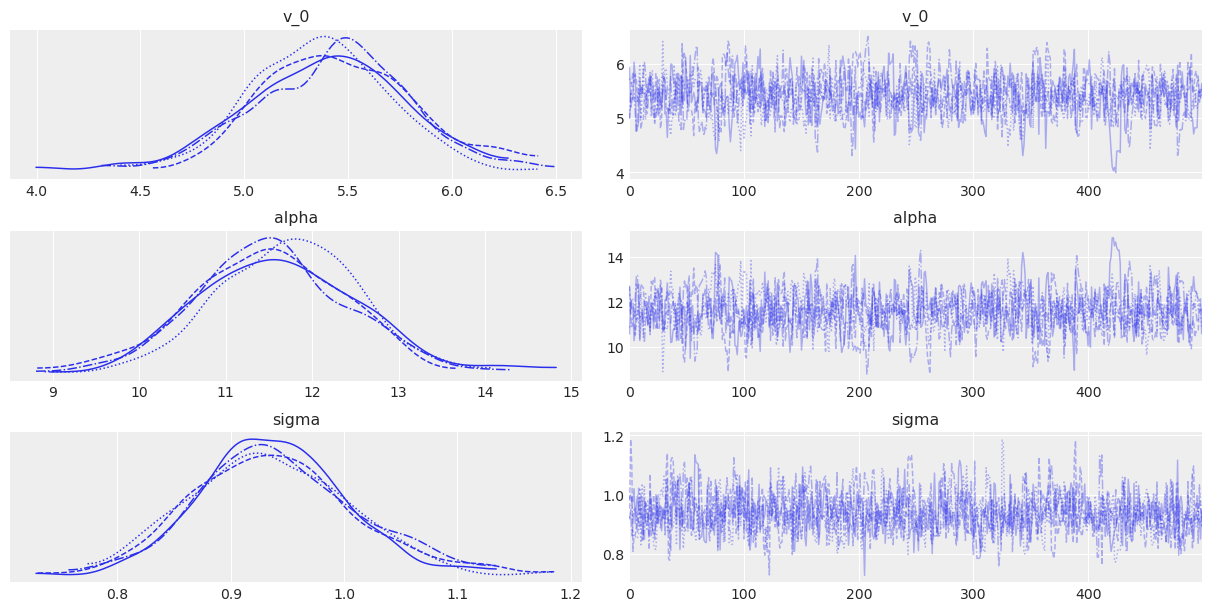

In [25]:
with basic_model:
    az.plot_trace(trace)

In [26]:
with basic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
v_0,5.41,0.37,4.74,6.13,0.01,0.01,814.09,714.86,1.01
alpha,11.59,0.89,10.02,13.29,0.03,0.02,807.02,657.27,1.01
sigma,0.94,0.07,0.81,1.06,0.00,0.00,984.08,1055.51,1.00


CI for $\alpha$ is $[-1.82, -1.55]$

### Volcanic eruptions on Earth 2

In [27]:
df_erup = pd.read_csv('duplicate-earth-eruptions.csv')

In [28]:
df_erup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   week                57 non-null     int64
 1   volcanic eruptions  57 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


In [29]:
df_erup.head()

,week,volcanic eruptions
0,1,13
1,2,6
2,3,14
3,4,6
4,5,5


In [30]:
week = df_erup['week']
eruption = df_erup['volcanic eruptions']

In [31]:
week.head()

0    1
1    2
2    3
3    4
4    5
Name: week, dtype: int64

In [32]:
eruption.head()

0    13
1     6
2    14
3     6
4     5
Name: volcanic eruptions, dtype: int64

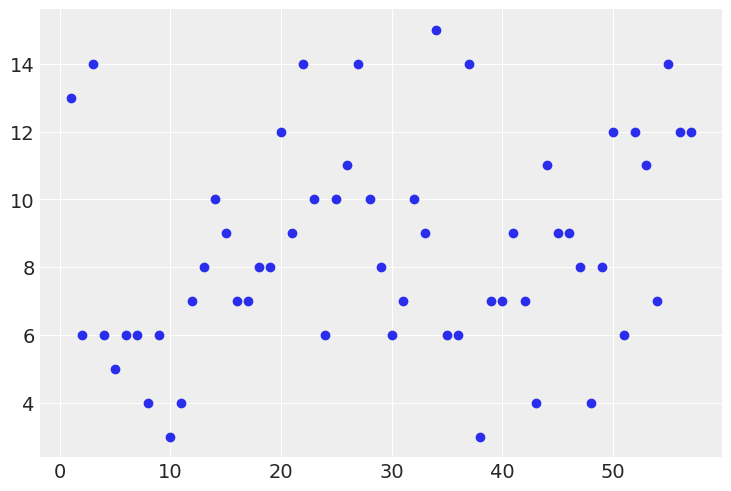

In [33]:
pylab.scatter(week, eruption)

#### MLE Rate

In [35]:
prior_lambda_model = pm.Model()

In [37]:
with prior_lambda_model:
    
    # Priors for rate number of disasters
    rate = pm.TruncatedNormal("rate", mu=16, sigma = 1, lower=0)

    eruptions = pm.Poisson("eruptions", rate, observed=eruption)

In [38]:
map_prior_eruption = pm.find_MAP(model=prior_lambda_model)
map_prior_eruption

{'rate_lowerbound__': array(2.26217826), 'rate': array(9.60398641)}

#### Bayesian Model Specification

In [ ]:
eruption_model = pm.Model()

In [ ]:
with eruption_model:
    
    # Priors for rate number of disasters
    rate = pm.Normal("rate", mu=16, sigma=1)

    eruptions = pm.Poisson("eruptions", rate, observed=eruption)

In [ ]:
map_estimate_eruption = pm.find_MAP(model=eruption_model)
map_estimate_eruption

#### Sampling the Posterior Distribution

In [ ]:
with eruption_model:
    trace = pm.sample(10000, return_inferencedata=False)

In [ ]:
with eruption_model:
    az.plot_trace(trace)

In [ ]:
with eruption_model:
    display(az.summary(trace, round_to=2))

$CI = [8.86, 10.34]$